In [1]:
import sys
sys.path.append("..")

%load_ext autoreload
%autoreload complete

In [2]:
import matplotlib.pyplot as plt
import xarray as xr

from project.test_pendulum import *
from project.lim import LIM

In [3]:
def make_dataset():
    tt, xx, yy = run_oscillator(t_end=800, sigma=0)

    ds = xr.Dataset({
        "x": (["time"], yy[0,:]),
        "v": (["time"], yy[1,:]),
    }, coords={
        "time": tt
    })

    return ds, xx

ds, xx = make_dataset()
ds

G: [[1.         1.10517092]
 [0.99004983 0.998002  ]]
L: [[ 0.    1.  ]
 [-0.1  -0.02]]
Eigenvalues of L: [-0.01+0.31606961j -0.01-0.31606961j]


<xarray.Dataset>
Dimensions:  (time: 8000)
Coordinates:
  * time     (time) float64 0.0 0.1 0.2 0.3 0.4 ... 799.6 799.7 799.8 799.9
Data variables:
    x        (time) float64 1.0 1.0 0.999 ... 5.958e-06 -0.0005729 -0.001151
    v        (time) float64 0.0 -0.01 -0.01998 ... -0.005789 -0.005778 -0.00576

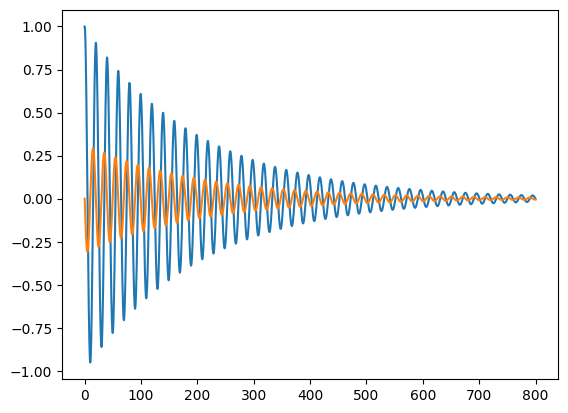

In [4]:
plt.plot(ds.time, ds["x"])
plt.plot(ds.time, ds["v"])

plt.show()

In [12]:
lim = LIM()
lim.fit_np(xx)
lim.print_properties()
lim.fit(ds)
lim.print_properties()

G1: [[ 1.          0.09999999]
 [-0.01        0.998     ]]
L: [[-5.38085576e-09 -2.30258521e+01]
 [            nan -2.00200274e-02]]
Eigenvalues of L: [-0.00500251+0.31628048j -0.00500251-0.31628048j]
G1: <xarray.DataArray (state1: 2, state2: 2)>
array([[ 1.00037476, -0.00224897],
       [-0.00224897,  1.00237361]])
Coordinates:
  * state1   (state1) object MultiIndex
  * field1   (state1) <U1 'x' 'v'
  * state2   (state2) object MultiIndex
  * field2   (state2) <U1 'x' 'v'
L: <xarray.DataArray (state1: 2, state2: 2)>
array([[0.00374693,        nan],
       [       nan, 0.02370801]])
Coordinates:
  * state1   (state1) object MultiIndex
  * field1   (state1) <U1 'x' 'v'
  * state2   (state2) object MultiIndex
  * field2   (state2) <U1 'x' 'v'
Eigenvalues of L: [-0.01087446  0.03827895]


/glade/u/home/dstiller/dev/uw-enspred/project/notebooks/../project/lim.py:51: RuntimeWarning: invalid value encountered in log
  print("L:", np.log(self.G_tau0) / self.tau0)
/glade/work/dstiller/conda-envs/earth2mip/lib/python3.10/site-packages/xarray/core/computation.py:821: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)


In [11]:
tt2, xx2 = lim.forecast(np.array([1, 0]), int(800 / 0.1))

plt.plot(tt2, xx2[0, :])
plt.plot(tt2, xx2[1, :])

plt.show()

TypeError: dot only operates on DataArrays.